Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             48842 non-null  int64
 1   fnlwgt          48842 non-null  int64
 2   education_num   48842 non-null  int64
 3   capital_gain    48842 non-null  int64
 4   capital_loss    48842 non-null  int64
 5   hours_per_week  48842 non-null  int64
 6   income_level    48842 non-null  int64
dtypes: int64(7)
memory usage: 2.6 MB
None

First 5 rows:
   age  fnlwgt  education_num  capital_gain  capital_loss  hours_per_week  \
0   39   77516             13          2174             0              40   
1   50   83311             13             0             0              13   
2   38  215646              9             0             0              40   
3   53  234721              7             0             0              40   
4   28  338409             13             0     

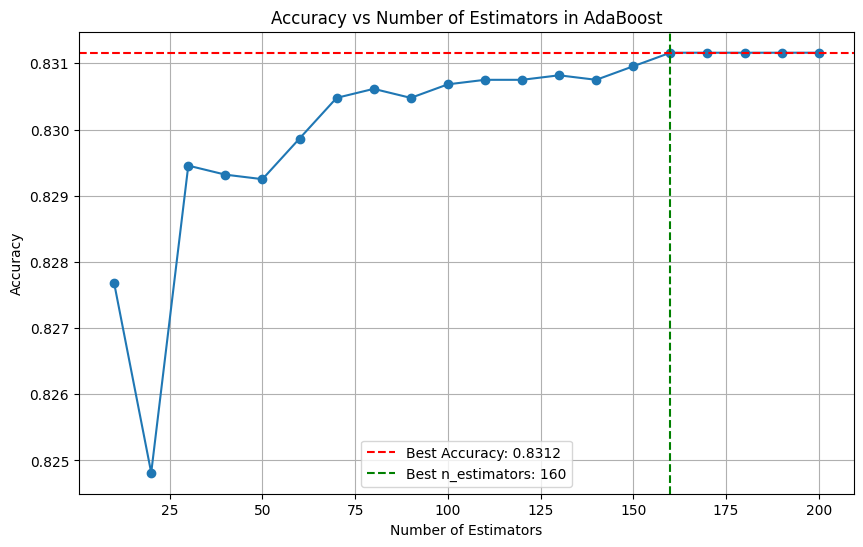

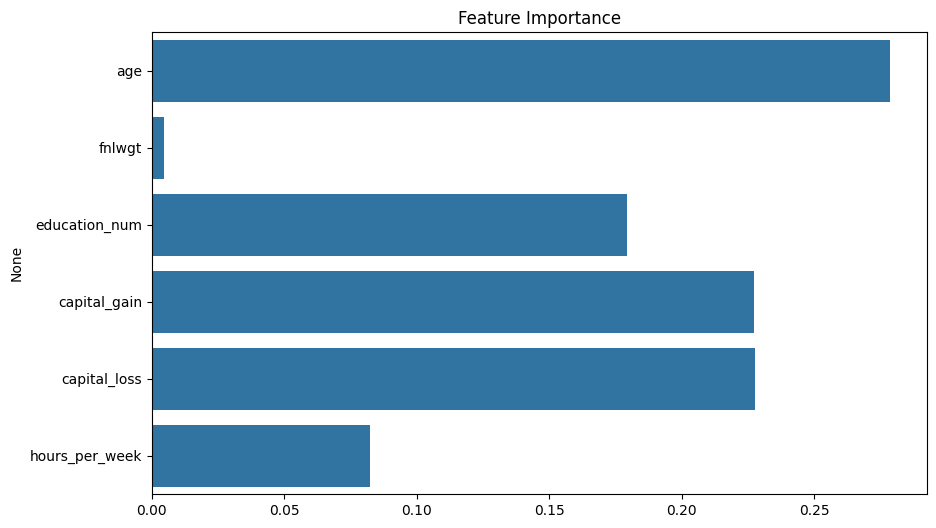

In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
income_data = pd.read_csv('/content/income.csv')

# Display basic info
print("Dataset Info:")
print(income_data.info())
print("\nFirst 5 rows:")
print(income_data.head())

# Preprocessing
# Convert categorical variables to numerical
label_encoders = {}
categorical_cols = income_data.select_dtypes(include=['object']).columns

for col in categorical_cols:
    le = LabelEncoder()
    income_data[col] = le.fit_transform(income_data[col])
    label_encoders[col] = le

# Separate features and target - USING income_level AS TARGET
X = income_data.drop('income_level', axis=1)  # Using correct column name
y = income_data['income_level']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1. Build AdaBoost with n_estimators=10
ada_default = AdaBoostClassifier(n_estimators=10, random_state=42)
ada_default.fit(X_train, y_train)

# Predictions
y_pred_default = ada_default.predict(X_test)
default_accuracy = accuracy_score(y_test, y_pred_default)
print(f"\nAdaBoost (10 estimators) Accuracy: {default_accuracy:.4f}")

# Confusion matrix
print("\nConfusion Matrix (Default Model):")
cm_default = confusion_matrix(y_test, y_pred_default)
print(cm_default)

# Classification report
print("\nClassification Report (Default Model):")
print(classification_report(y_test, y_pred_default))

# 2. Fine-tune by changing number of estimators
n_estimators_range = range(10, 201, 10)  # Testing from 10 to 200 in steps of 10
accuracies = []

for n_est in n_estimators_range:
    ada = AdaBoostClassifier(n_estimators=n_est, random_state=42)
    ada.fit(X_train, y_train)
    y_pred = ada.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Estimators: {n_est:3d} | Accuracy: {accuracy:.4f}")

# Find best accuracy
best_accuracy = max(accuracies)
best_n_estimators = n_estimators_range[accuracies.index(best_accuracy)]
print(f"\nBest Accuracy: {best_accuracy:.4f} achieved with {best_n_estimators} estimators")

# Build best model
ada_best = AdaBoostClassifier(n_estimators=best_n_estimators, random_state=42)
ada_best.fit(X_train, y_train)
y_pred_best = ada_best.predict(X_test)

# Confusion matrix for best model
print("\nConfusion Matrix (Best Model):")
cm_best = confusion_matrix(y_test, y_pred_best)
print(cm_best)

# Classification report for best model
print("\nClassification Report (Best Model):")
print(classification_report(y_test, y_pred_best))

# Plot accuracy vs number of estimators
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, accuracies, marker='o')
plt.title('Accuracy vs Number of Estimators in AdaBoost')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.axhline(y=best_accuracy, color='r', linestyle='--', label=f'Best Accuracy: {best_accuracy:.4f}')
plt.axvline(x=best_n_estimators, color='g', linestyle='--', label=f'Best n_estimators: {best_n_estimators}')
plt.legend()
plt.grid()
plt.show()

# Feature importance
if hasattr(ada_best, 'feature_importances_'):
    feature_importance = ada_best.feature_importances_
    features = X.columns
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importance, y=features)
    plt.title('Feature Importance')
    plt.show()